# 10-4-1 ImageFolder (1)

In [119]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

In [120]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [121]:
!ls Image

class_1    class_2    test_data  train_data


In [122]:
# transform 시키기
trans = transforms.Compose([
    transforms.Resize((64,128))
    ])

train_data = torchvision.datasets.ImageFolder(root = "Image",
                                              transform= trans)

In [123]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if (label == 0):
        data.save("Image/train_data/class_1/%d_%d.jpeg"%(num,label))
    else:
        data.save("Image/train_data/class_2/%d_%d.jpeg"%(num,label))
        

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3A30F10> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAF107D580> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3B65AF0> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3BFAA90> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3B65D60> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3D137F0> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAD8554C70> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3CD74F0> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3A30F10> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAD8552C10> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3CD74F0> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAE3D137F0> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAF14ACD30> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAF1313A30> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FBAF1

# Neural Network 만들기

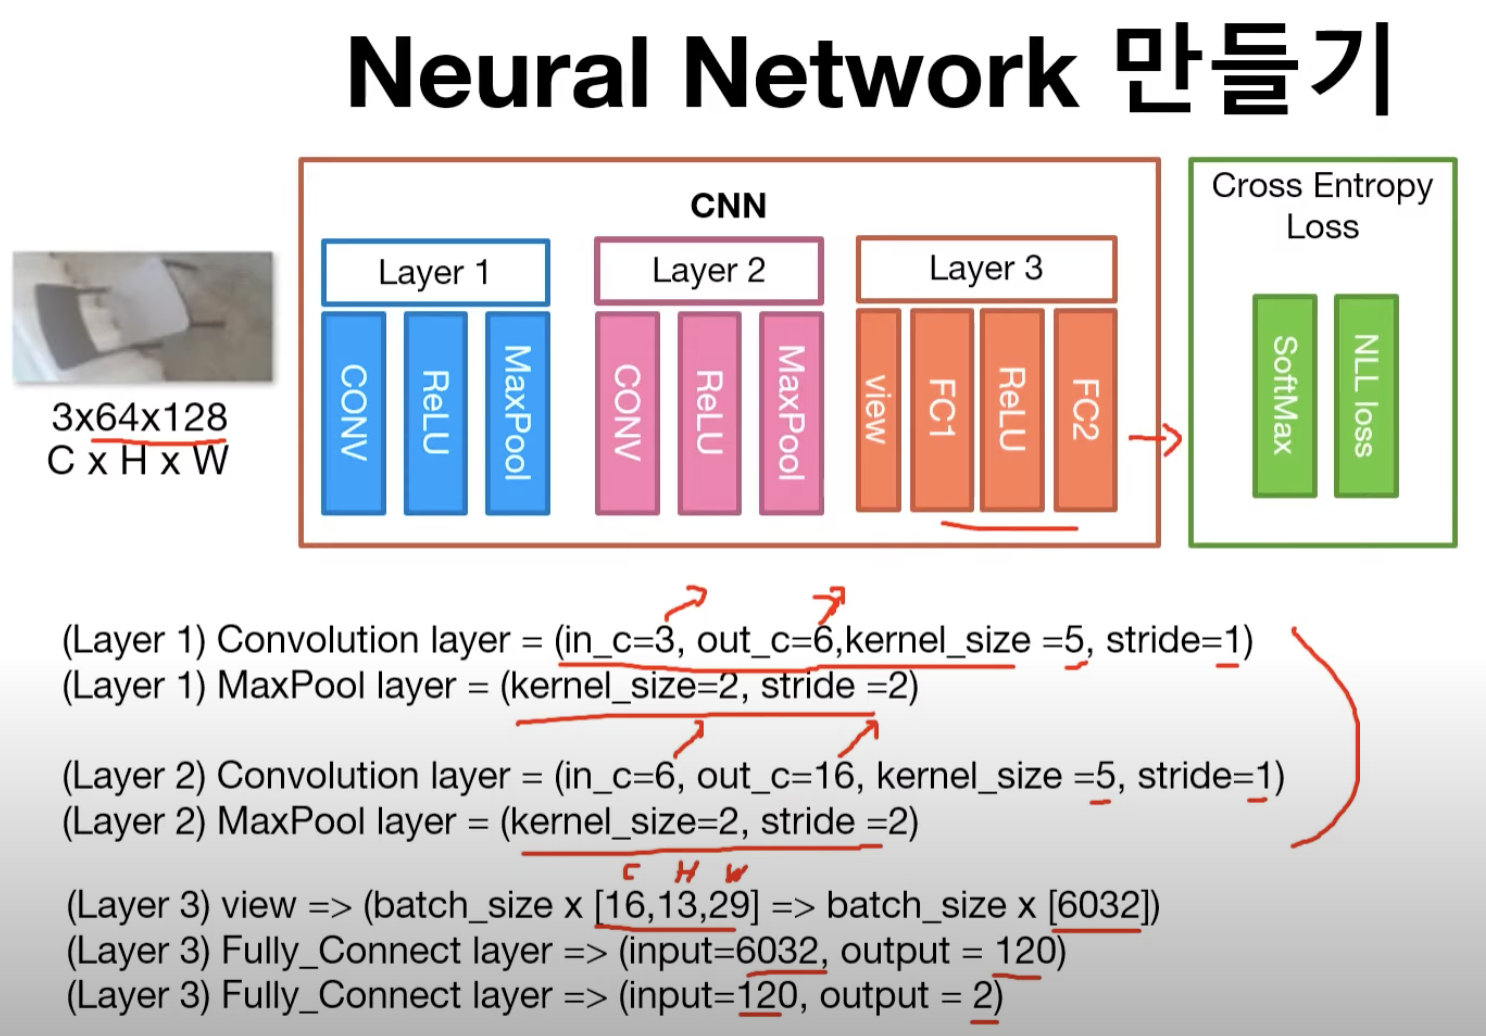

In [32]:
# 1) import
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# 2) device
device = "cuda" if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)
print(device)

cpu


In [33]:
# 3) Dataset 준비
trans = transforms.Compose([
    transforms.ToTensor()
])

# 우리는 ImageFolder 이용
train_data = torchvision.datasets.ImageFolder(root = "Image/train_data/", transform= trans)


In [34]:
# 4)DataLoader만들기
data_loader = DataLoader(dataset = train_data, batch_size= 8, shuffle= True, num_workers = 2)


In [53]:
#5) Model 만들기
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),

        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self,x):
        out = self.layer1(x)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = out.view(out.size(0),-1)
#         print(out.size()) #--> 이것만 있어도 CNN에서 FC로 넘어갈 때 값을 생각해볼 수 있겠구나. 
        out = self.layer3(out)        
        return out
    
model = CNN().to(device)
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=6032, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=2, bias=True)
  )
)

In [64]:
# Debugging용으로 하나 Test 넣어보면 됌.
test = torch.Tensor(5,3,64,128)
torch.softmax(model(test),1)

tensor([[0.4872, 0.5128],
        [0.4872, 0.5128],
        [0.4872, 0.5128],
        [0.4872, 0.5128],
        [0.4872, 0.5128]], grad_fn=<SoftmaxBackward>)

In [73]:
# 6) optimizer & loss
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.00001)


In [79]:
total_batch = len(data_loader)

epochs = 100
for epoch in range(epochs):
    avg_cost = 0
    for num, data in enumerate(data_loader):
        imgs, labels = data
        imgs = imgs.to(device) # cuda 전용 Tensor로 만들어줄때 필요한 코드임.
        labels = labels.to(device)
        
        #forward
        out = model(imgs)
        cost = criterion(out, labels)
        
        #optim
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
    print("Epoch:{:04d} cost = {:.4f}".format(epoch+1,avg_cost))
print("Learning Finished!")
        


Epoch:0001 cost = 0.6561
Epoch:0002 cost = 0.6538
Epoch:0003 cost = 0.6512
Epoch:0004 cost = 0.6472
Epoch:0005 cost = 0.6295
Epoch:0006 cost = 0.6273
Epoch:0007 cost = 0.6255
Epoch:0008 cost = 0.6386
Epoch:0009 cost = 0.6156
Epoch:0010 cost = 0.6124
Epoch:0011 cost = 0.6103
Epoch:0012 cost = 0.6057
Epoch:0013 cost = 0.6277
Epoch:0014 cost = 0.6241
Epoch:0015 cost = 0.6219
Epoch:0016 cost = 0.5940
Epoch:0017 cost = 0.6185
Epoch:0018 cost = 0.6165
Epoch:0019 cost = 0.5824
Epoch:0020 cost = 0.6111
Epoch:0021 cost = 0.6103
Epoch:0022 cost = 0.5780
Epoch:0023 cost = 0.5747
Epoch:0024 cost = 0.5738
Epoch:0025 cost = 0.5676
Epoch:0026 cost = 0.5655
Epoch:0027 cost = 0.6012
Epoch:0028 cost = 0.5994
Epoch:0029 cost = 0.5589
Epoch:0030 cost = 0.6349
Epoch:0031 cost = 0.5509
Epoch:0032 cost = 0.5539
Epoch:0033 cost = 0.5485
Epoch:0034 cost = 0.5927
Epoch:0035 cost = 0.5424
Epoch:0036 cost = 0.5869
Epoch:0037 cost = 0.5874
Epoch:0038 cost = 0.5860
Epoch:0039 cost = 0.6336
Epoch:0040 cost = 0.5837


# Weight 를 저장하는 방법 및 불러오기.

In [72]:
torch.save(model.state_dict(), "./model/model.pth")

tensor([1, 0, 0, 0, 0, 0, 1, 0])

In [88]:
# 불러오기 --> 똑같은 Layer 구조여야함 --> 그래야 weight를 있는 그대로 가져오지.
new_net = CNN().to(device)
new_net.load_state_dict(torch.load("./model/model.pth"))

<All keys matched successfully>

In [97]:
# 맞는지 확인하기
print(model.layer1[0])
print(new_net.layer1[0])

print(model.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([ 0.0380,  0.0316, -0.0409, -0.0160,  0.0987], grad_fn=<SelectBackward>)
tensor([ 0.0380,  0.0316, -0.0409, -0.0160,  0.0987], grad_fn=<SelectBackward>)


# TEST하기

In [99]:
# test_set 불러오기
trans = torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_set = torchvision.datasets.ImageFolder(root = "./Image/test_data/", transform= trans)



In [105]:
# test_loader
test_loader = DataLoader(dataset=test_set,batch_size= len(test_set))

In [115]:
# test
with torch.no_grad():
    model.eval()
    for idx, sample in enumerate(test_loader):
        imgs, label = sample
        imgs = imgs.to(device)
        label = label.to(device)
        
        pred = model(imgs)
        correct_pred = torch.argmax(pred,1) == label
        acc = correct_pred.float().mean()
        
    print("Acc:", acc.item())
    
    

Acc: 0.625
